#### **Image Creation**

In [4]:
import numpy as np
from PIL import Image
import random

def create_image_with_black_box(width=500, height=500, box_width=100, box_height=100):
    # Create a white background with random values between 245-255
    background = np.array([[random.randint(245, 255) for _ in range(width)] for _ in range(height)], dtype=np.uint8)
    
    # Calculate the position to place the black box in the center
    start_x = (width - box_width) // 2
    start_y = (height - box_height) // 2
    
    # Add the black box with random values between 0-10
    for y in range(start_y, start_y + box_height):
        for x in range(start_x, start_x + box_width):
            background[y, x] = random.randint(0, 10)
    
    # Convert to image and return
    image = Image.fromarray(background, mode='L')  # 'L' mode for grayscale
    return image

# Create and save the image
if __name__ == "__main__":
    # Parameters
    image_width = 500
    image_height = 500
    black_box_width = 150
    black_box_height = 150
    
    # Create the image
    image = create_image_with_black_box(
        width=image_width, 
        height=image_height, 
        box_width=black_box_width, 
        box_height=black_box_height
    )
    
    # Save the image
    image.save("Image-1.png")
    
    print(f"Image created with dimensions {image_width}x{image_height}")
    print(f"Black box placed in center with dimensions {black_box_width}x{black_box_height}")

Image created with dimensions 500x500
Black box placed in center with dimensions 150x150


#### **Applying Horizantal and Vertical Filters**

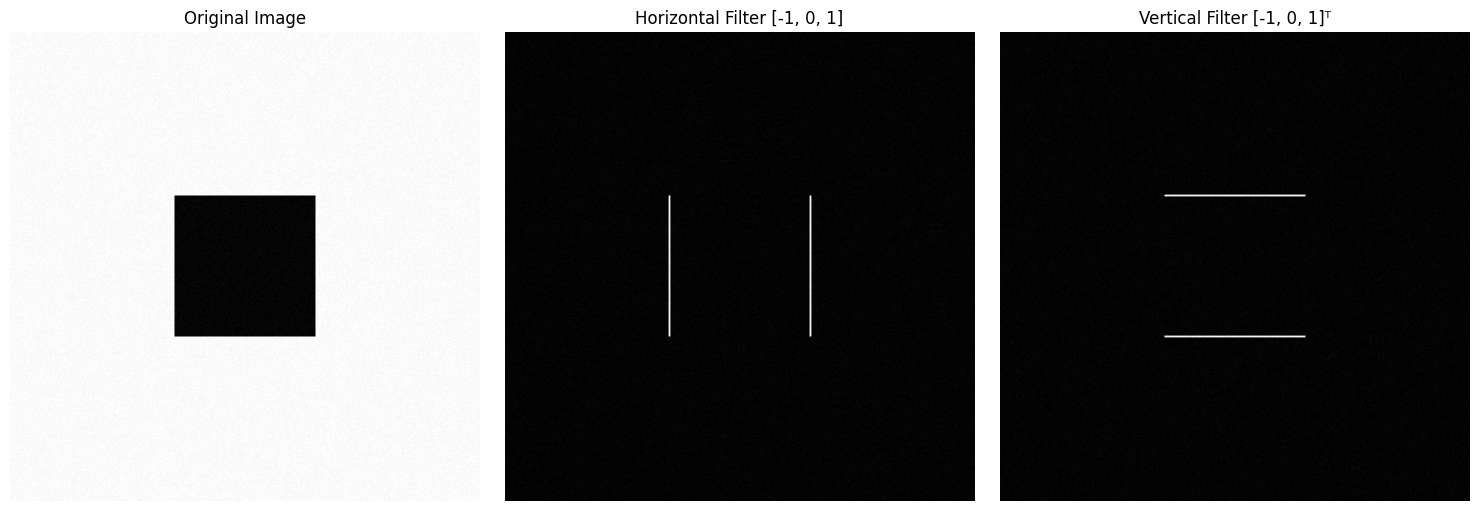

All images processed and saved:
1. original_image.png - The original image
2. horizontal_filtered_image.png - Image after applying horizontal filter [-1, 0, 1]
3. vertical_filtered_image.png - Image after applying vertical filter [-1, 0, 1]ᵀ
4. all_three_images.png - Side-by-side comparison of all three images


In [5]:
import numpy as np
from PIL import Image
import random
from scipy import signal
import matplotlib.pyplot as plt
import os

def apply_horizontal_filter(image_array):
    # Define horizontal filter [-1, 0, 1]
    horizontal_filter = np.array([[-1, 0, 1]])
    
    # Apply the filter using convolution
    filtered_image = signal.convolve2d(image_array, horizontal_filter, mode='same', boundary='symm')
    
    # Normalize the filtered image for better visualization
    filtered_image = np.abs(filtered_image)
    filtered_image = (filtered_image / np.max(filtered_image) * 255).astype(np.uint8)
    
    return filtered_image

def apply_vertical_filter(image_array):
    # Define vertical filter as transpose of horizontal filter
    vertical_filter = np.array([[-1], [0], [1]])
    
    # Apply the filter using convolution
    filtered_image = signal.convolve2d(image_array, vertical_filter, mode='same', boundary='symm')
    
    # Normalize the filtered image for better visualization
    filtered_image = np.abs(filtered_image)
    filtered_image = (filtered_image / np.max(filtered_image) * 255).astype(np.uint8)
    
    return filtered_image

# Main execution
if __name__ == "__main__":
    original_image = Image.open("Image-1.png").convert('L')  # Convert to grayscale
    
    # Convert the image to numpy array
    original_array = np.array(original_image)
    
    # Apply filters
    horizontal_filtered = apply_horizontal_filter(original_array)
    vertical_filtered = apply_vertical_filter(original_array)

    # Display all three images
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(horizontal_filtered, cmap='gray')
    plt.title('Horizontal Filter [-1, 0, 1]')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(vertical_filtered, cmap='gray')
    plt.title('Vertical Filter [-1, 0, 1]ᵀ')
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig("all_three_images.png")
    plt.show()
    
    print("All images processed and saved:")
    print("1. original_image.png - The original image")
    print("2. horizontal_filtered_image.png - Image after applying horizontal filter [-1, 0, 1]")
    print("3. vertical_filtered_image.png - Image after applying vertical filter [-1, 0, 1]ᵀ")
    print("4. all_three_images.png - Side-by-side comparison of all three images")

#### **Applying Harris Corner Detector**

Reading existing image 'original_image.png'...


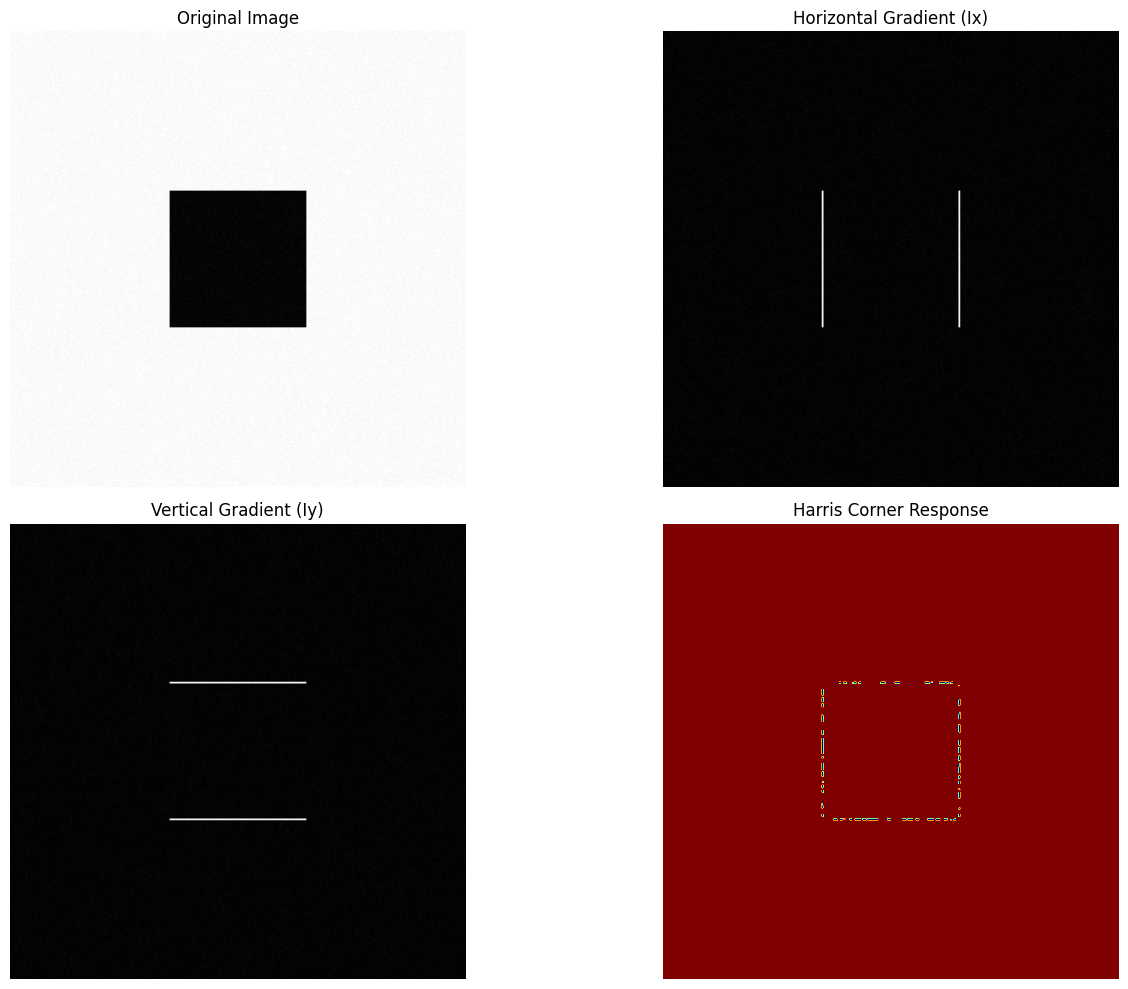

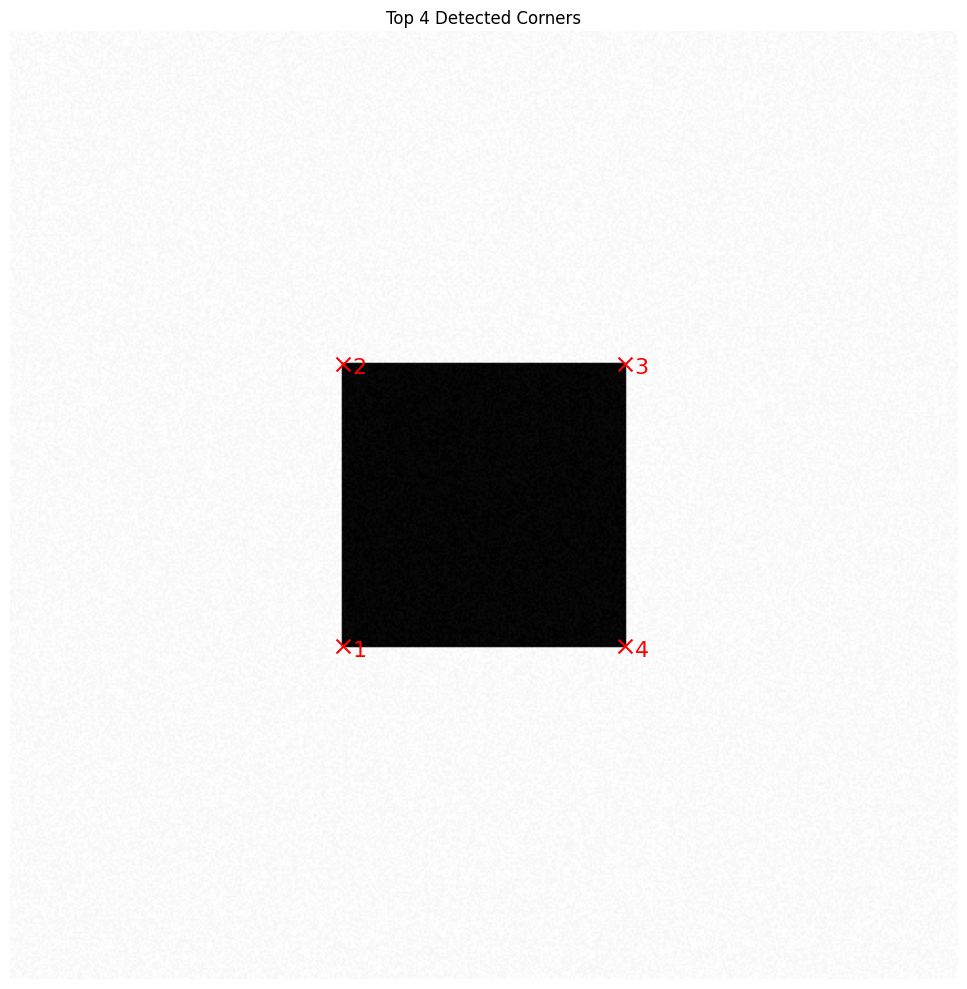


Top 4 corner coordinates (x, y):
Corner 1: (175, 324), Response value: 249.00
Corner 2: (175, 175), Response value: 249.00
Corner 3: (324, 175), Response value: 251.00
Corner 4: (324, 324), Response value: 255.00


In [ ]:
import numpy as np
from PIL import Image
import random
from scipy import signal
import matplotlib.pyplot as plt
import os

def apply_harris_corner_detector(image_array, k=0.04, window_size=3):
    # Convert image to float for calculations
    image_float = image_array.astype(np.float64)
    
    # Apply Gaussian blur to reduce noise (optional)
    # Using a small sigma for minimal smoothing
    gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0
    smoothed = signal.convolve2d(image_float, gaussian_kernel, mode='same', boundary='symm')
    
    # Compute image gradients
    horizontal_filter = np.array([[-1, 0, 1]])
    vertical_filter = np.array([[-1], [0], [1]])
    
    Ix = signal.convolve2d(smoothed, horizontal_filter, mode='same', boundary='symm')
    Iy = signal.convolve2d(smoothed, vertical_filter, mode='same', boundary='symm')
    
    # Compute products of gradients
    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    Ixy = Ix * Iy
    
    # Structure tensor components with Gaussian window
    window = np.ones((window_size, window_size))
    Sx2 = signal.convolve2d(Ix2, window, mode='same', boundary='symm')
    Sy2 = signal.convolve2d(Iy2, window, mode='same', boundary='symm')
    Sxy = signal.convolve2d(Ixy, window, mode='same', boundary='symm')
    
    # Compute corner response: C = [Ix²*Iy² - IxIy*IxIy] - k*(Ix² + Iy²)²
    # Using the formula you provided: C = [Ix²Iy² - IxIy·IxIy] - 0.04[Ix² + Iy²]
    determinant = Sx2 * Sy2 - Sxy * Sxy
    trace = Sx2 + Sy2
    harris_response = determinant - k * (trace * trace)
    
    # Normalize for visualization (0-255)
    harris_response_normalized = np.zeros_like(harris_response)
    cv_min, cv_max = harris_response.min(), harris_response.max()
    if cv_max > cv_min:
        harris_response_normalized = ((harris_response - cv_min) / (cv_max - cv_min) * 255).astype(np.uint8)
    
    # Simple thresholding for corner detection
    corners = np.zeros_like(harris_response_normalized)
    threshold = 0.01 * harris_response_normalized.max()  # Adaptive threshold
    corners[harris_response_normalized > threshold] = 255
    
    return harris_response_normalized, corners

# Main execution
if __name__ == "__main__":
    # Check if original_image.png exists, if not create it
    if not os.path.exists("Image-1.png"):
        print("Creating new image with black box...")
        original_image = create_image_with_black_box(500, 500, 150, 150)
    else:
        print("Reading existing image 'original_image.png'...")
        original_image = Image.open("Image-1.png").convert('L')  # Convert to grayscale
    
    # Convert the image to numpy array
    original_array = np.array(original_image)
    
    # Apply the Harris corner detector
    harris_response, harris_response_normalized = apply_harris_corner_detector(original_array)
    
    
    # Find the top 4 corner points
    # First, apply non-maximum suppression to avoid multiple detections in the same region
    # Create a mask to exclude border pixels
    border = 10
    mask = np.zeros_like(harris_response)
    mask[border:-border, border:-border] = 1
    
    # Apply mask to the response
    masked_response = harris_response * mask
    
    # Find the top 4 corner locations
    flattened = masked_response.flatten()
    top_indices = np.argsort(flattened)[-4:]  # Get the indices of 4 highest values
    
    # Convert flat indices back to 2D coordinates
    height, width = harris_response.shape
    top_coordinates = [(idx % width, idx // width) for idx in top_indices]
    
    # For visualization, create a binary image with only the top 4 corners
    top4_corners = np.zeros_like(harris_response_normalized)
    for x, y in top_coordinates:
        # Mark a small area around each corner
        y_min, y_max = max(0, y-2), min(height, y+3)
        x_min, x_max = max(0, x-2), min(width, x+3)
        top4_corners[y_min:y_max, x_min:x_max] = 255
    
    # Image.fromarray(top4_corners, mode='L').save("top4_corners.png")
    
    # Apply horizontal and vertical filters for comparison
    horizontal_filter = np.array([[-1, 0, 1]])
    vertical_filter = np.array([[-1], [0], [1]])
    
    Ix = signal.convolve2d(original_array.astype(np.float64), horizontal_filter, mode='same', boundary='symm')
    Iy = signal.convolve2d(original_array.astype(np.float64), vertical_filter, mode='same', boundary='symm')
    
    # Normalize Ix and Iy for visualization
    Ix_normalized = np.abs(Ix)
    Ix_normalized = (Ix_normalized / np.max(Ix_normalized) * 255).astype(np.uint8)
    
    Iy_normalized = np.abs(Iy)
    Iy_normalized = (Iy_normalized / np.max(Iy_normalized) * 255).astype(np.uint8)
    
    # Display all images
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.imshow(Ix_normalized, cmap='gray')
    plt.title('Horizontal Gradient (Ix)')
    plt.axis('off')
    
    plt.subplot(2, 2, 3)
    plt.imshow(Iy_normalized, cmap='gray')
    plt.title('Vertical Gradient (Iy)')
    plt.axis('off')
    
    plt.subplot(2, 2, 4)
    plt.imshow(harris_response_normalized, cmap='jet')
    plt.title('Harris Corner Response')
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig("harris_corner_detection.png")
    plt.show()
    
    # Create another plot to show only the top 4 corners overlaid on original image
    plt.figure(figsize=(10, 10))
    plt.imshow(original_array, cmap='gray')
    
    # Plot the top 4 corners
    x_corners = [x for x, y in top_coordinates]
    y_corners = [y for x, y in top_coordinates]
    plt.scatter(x_corners, y_corners, color='red', s=100, marker='x')
    
    # Add corner numbers
    for i, (x, y) in enumerate(zip(x_corners, y_corners)):
        plt.text(x+5, y+5, str(i+1), color='red', fontsize=16)
    
    plt.title('Top 4 Detected Corners')
    plt.axis('off')
    plt.tight_layout()
    # plt.savefig("top4_corners_overlay.png")
    plt.show()
    
    # Print the coordinates of the top 4 corners
    print("\nTop 4 corner coordinates (x, y):")
    for i, (x, y) in enumerate(top_coordinates):
        print(f"Corner {i+1}: ({x}, {y}), Response value: {harris_response[y, x]:.2f}")